# Contextualização  

O banco de dados que escolhemos analisar faz parte de um pacote chamado "dados", se trata de um pacote que traduz bases de dados de outros pacotes. E a database que analisamos traz os números referentes a bilheteria de alguns filmes da pixar.

# Carregamento de pacotes
Os pacotes que iremos utilizar serão:

In [4]:
library(tidyverse)
library(kableExtra)
library(dados);

# Leitura e visualização do banco de dados

  As bases que utilizaremos contam com um total de 24 observações e 10 variáveis, sendo elas: 
  
  1. `filme`: Nome do filme analisado 
  1. `orcamento`: Orçamento que o filme recebeu para sua produção em milhões de dólares 
  1. `bilheteria_eua_canada`: Valor arrecadado com as bilheterias dos Estados Unidos e do Canadá em milhões de dólares
  1. `bilheteria_outros_paises`: Valor arrecadado com as bilheterias de outros países além dos Estados Unidos e do Canadá em milhões de dólares
  1. `bilheteria_mundial`: Bilheteria total arrecadada em milhões de dólares
  1. `nota_rotten_tomatoes`: Nota crítica do filme pelo site [Rotten Tomatoes](https://www.rottentomatoes.com) de 0 (ruim) à 100 (bom)
  1. `nota_metacritic`: Nota crítica do filme pelo site [Metacritic](https://www.metacritic.com) de 0 (ruim) à 100 (bom)
  1. `nota_cinema_score`: Nota crítica do filme pelo site [Cinema Score](https://www.cinemascore.com) sendo avaliado de -A (ruim) à A++ (bom)
  1. `nota_critics_choice`: Nota crítica pelo site [Critics Choice](https://www.cinemascore.com) de 0 (ruim) à 100 (bom)

In [5]:
dados1 <- pixar_bilheteria
dados1[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises",
         "bilheteria_mundial")] <- dados1[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises","bilheteria_mundial")]/1e6
renomeando_colunas <- c(
  "Filmes", "Orçamento", "Bilheteria EUA/CA", "Bilheteria de outros países",
  "Bilheteria mundial"
)
colnames(dados1) <- renomeando_colunas
glimpse(dados1)

Rows: 24
Columns: 5
$ Filmes                        <chr> "Toy Story - Um Mundo de Aventuras", "Vi…
$ Orçamento                     <dbl> 30, 120, 90, 115, 94, 92, 120, 150, 180,…
$ `Bilheteria EUA/CA`           <dbl> 191.79623, 162.79856, 245.85218, 289.916…
$ `Bilheteria de outros países` <dbl> 181.75780, 200.46029, 251.52260, 342.400…
$ `Bilheteria mundial`          <dbl> 373.5540, 363.2589, 497.3748, 632.3166, …


## Coluna com os filmes

Alguns filmes que foram analizados: 

In [15]:
View(dados1)

filme,orcamento,bilheteria_eua_canada,bilheteria_outros_paises,bilheteria_mundial
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Toy Story - Um Mundo de Aventuras,30,191.79623,181.75780,373.5540
Vida de Inseto,120,162.79856,200.46029,363.2589
Toy Story 2,90,245.85218,251.52260,497.3748
Monstros S. A.,115,289.91626,342.40039,632.3166
Procurando Nemo,94,339.71498,531.30000,871.0150
Os Incríveis,92,261.44109,370.16562,631.6067
Carros,120,244.08298,217.90017,461.9831
Ratatouille,150,206.44565,417.28043,623.7261
WALL-E,180,223.80816,297.50370,521.3119


# Gráficos   
## Orçamento por filme

  Neste gráfico podemos observar quais filmes tiveram melhor orçamento para sua produção

Warning message in geom_col(stat = "identity", width = 1):
"Ignoring unknown parameters: `stat`"
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


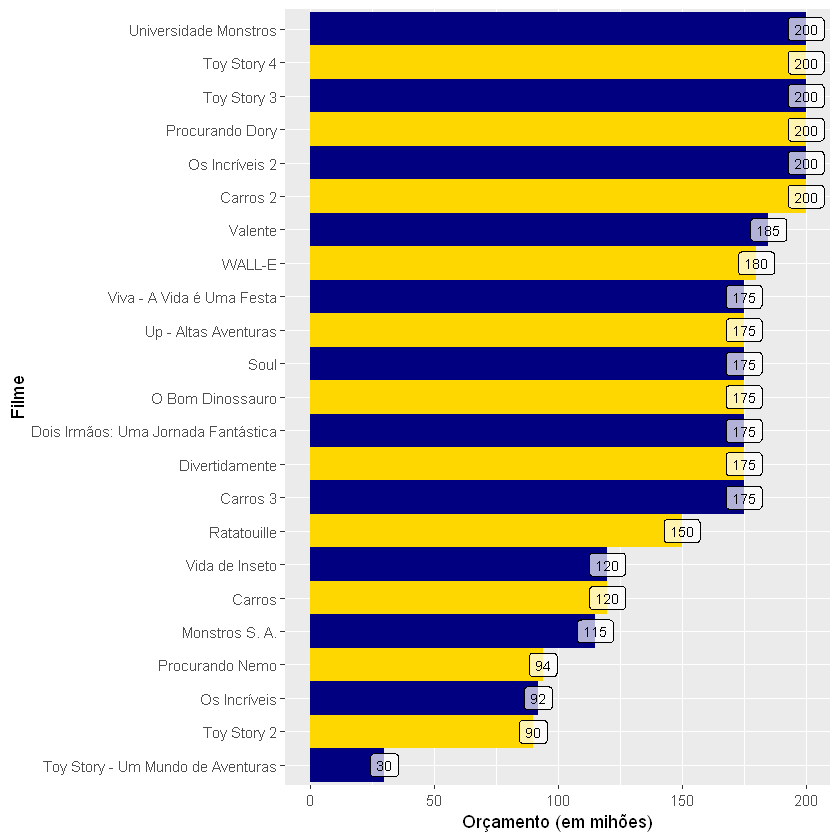

In [12]:
dados <- pixar_bilheteria
dados[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises",
         "bilheteria_mundial")] <- dados[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises","bilheteria_mundial")]/1e6
dados1 <- slice(dados, -24)
ggplot(dados1, aes(x = reorder(filme, orcamento), y = orcamento, fill = filme, label = orcamento))+
  geom_col(stat = "identity", width = 1.0)+
  coord_flip()+
  scale_fill_manual(values = c("WALL-E" = "gold",
                               "Viva - A Vida é Uma Festa" = "navy",
                    "Vida de Inseto" = "navy",
                    "Valente" = "navy",
                    "Up - Altas Aventuras" = "gold",
                    "Universidade Monstros" = "navy",
                    "Toy Story 4" = "gold",
                    "Toy Story 3" = "navy",
                    "Toy Story 2" = "gold",
                     "Toy Story - Um Mundo de Aventuras" = "navy",
                    "Soul" = "navy",
                    "Ratatouille" = "gold",
                    "Procurando Nemo" = "gold",
                    "Procurando Dory" = "gold",
                    "Os Incríveis 2" = "navy",
                    "Os Incríveis" = "navy",
                    "O Bom Dinossauro" = "gold",
                    "Monstros S. A." = "navy",
                    "Dois Irmãos: Uma Jornada Fantástica" = "navy",
                    "Divertidamente" = "gold",
                    "Carros 3" = "navy",
                    "Carros 2" = "gold",
                    "Carros" = "gold"
                     ))+
  theme_replace()+
  theme(legend.position="none")+
  geom_label(fill = "white", alpha = 0.7, size = 3.0)+
  scale_y_continuous(expand = expansion(add = c(0,0)))+
ggplot2::scale_y_continuous()+
  labs(y = "Orçamento (em mihões)", x = "Filme")

## Comparando as Bilheterias   

  Neste gráfico comparamos a bilheteria arrecadada nos Estados Unidos e Canadá com o restantante do mundo. Podemos observar que os dois países lideram o consumo de filmes e representam juntos quase metade de todo o valor arrecadado mundialmente.

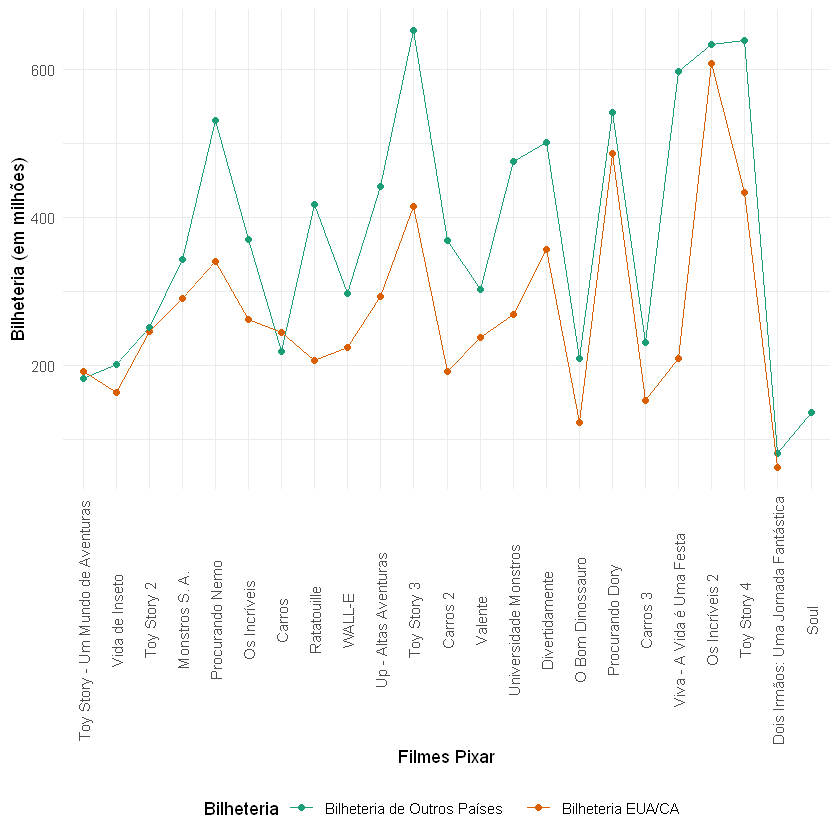

In [13]:
dados <- pixar_bilheteria
dados[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises",
         "bilheteria_mundial")] <- dados[c("orcamento", "bilheteria_eua_canada", "bilheteria_outros_paises","bilheteria_mundial")]/1e6
dados2 <- dados |> 
  select (-orcamento, -bilheteria_mundial) |> 
  mutate(filme = fct_inorder(filme)) |> 
  pivot_longer(cols = c("bilheteria_eua_canada", "bilheteria_outros_paises"),
               names_to = "bilheteria",
               values_to = "valor") |>
  mutate(bilheteria = case_when(
    bilheteria == "bilheteria_eua_canada" ~ "Bilheteria EUA/CA",
    bilheteria == "bilheteria_outros_paises" ~ "Bilheteria de Outros Países"
  )) |> 
  drop_na()
dados2 |> 
  ggplot(aes(x = filme, y = valor, col = bilheteria)) +
  geom_point() +
  geom_line(aes(group = bilheteria)) +
  scale_color_brewer(palette = "Dark2") +
  labs(x = "Filmes Pixar", y = "Bilheteria (em milhões)") +
  guides(col = guide_legend(title = "Bilheteria")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5),
        legend.position = "bottom")

## Comparando Avaliações com as Bilheterias    
 
  Aqui podemos observar que a bilheteria dos filmes pode ser correlacionada com o valor arçamentário que o filme teve para ser produzido porém, a nota, mesmo com observações consideráveis, não tem resultados conclusívos a respeito da sua correlação com o orçamento.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


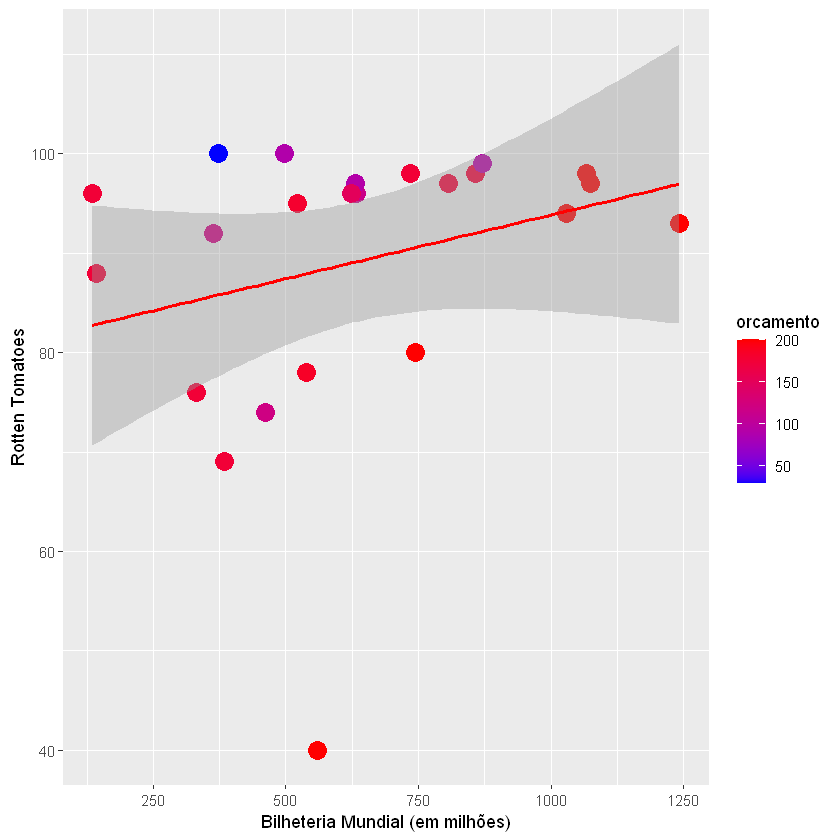

In [14]:
dados3 <- pixar_avalicao_publico
dados4 <- merge.data.frame(dados, dados3)
ggplot(dados4, aes(x = bilheteria_mundial, y = nota_rotten_tomatoes,
                   color = orcamento))+
  geom_point(size = 5.0)+
  scale_color_gradient(low = "blue", high = "red")+
  stat_smooth(method = "lm", col = "red")+
  labs(x = "Bilheteria Mundial (em milhões)", y = "Rotten Tomatoes")